In [1]:
import pandas as pd


In [2]:
df=pd.read_excel(r"D:\New Volume\My field visit 2024\Field Data for Data Analysis\Data ready for PCA.xlsx")

In [3]:
df.isnull().sum()

ix. Number of family members living in the house:     4
ii. Age:                                              4
iv. Gender:                                           4
Dalit/Non Dalit                                       4
xi. Household Type: • Male headed • Female headed     4
                                                     ..
Loans Sources_No loans                                0
Social Association type_No association                0
Social Association type_Political party               0
Social Association type_Religious organisation        0
Education_Normalized                                  2
Length: 103, dtype: int64

In [4]:
df.dropna(inplace=True)


In [5]:
df.isnull().sum()

ix. Number of family members living in the house:     0
ii. Age:                                              0
iv. Gender:                                           0
Dalit/Non Dalit                                       0
xi. Household Type: • Male headed • Female headed     0
                                                     ..
Loans Sources_No loans                                0
Social Association type_No association                0
Social Association type_Political party               0
Social Association type_Religious organisation        0
Education_Normalized                                  0
Length: 103, dtype: int64

In [6]:
df.describe()

,ix. Number of family members living in the house:,ii. Age:,iv. Gender:,Dalit/Non Dalit,xi. Household Type: • Male headed • Female headed,Do you have land that has been abandoned,"Is there any human wildlife conflict in this area? (Yes=1, No=0)","If yes, what kind of animal? /Urna","If yes, what kind of animal? /Elephant","If yes, what kind of animal? /Both",...,Loans Sources_Commercial banks,Loans Sources_Cooperatives,Loans Sources_Finance Companies,Loans Sources_Locally,Loans Sources_Microfinance,Loans Sources_No loans,Social Association type_No association,Social Association type_Political party,Social Association type_Religious organisation,Education_Normalized
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,5.380435,42.668478,0.266304,0.494565,0.043478,0.760870,0.875000,0.016304,0.016304,0.853261,...,0.059783,0.027174,0.021739,0.092391,0.157609,0.641304,0.815217,0.173913,0.010870,0.197011
std,1.291776,14.096618,0.443231,0.501335,0.204488,0.427716,0.331621,0.126989,0.126989,0.354811,...,0.237731,0.163034,0.146228,0.290368,0.365368,0.480926,0.389180,0.380069,0.103972,0.181762
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,30.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,5.000000,42.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000
75%,6.000000,55.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000
max,9.000000,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print("Columns:", df.columns.tolist())

Columns: ['ix. Number of family members living in the house: ', 'ii. Age: ', 'iv. Gender:', 'Dalit/Non Dalit', 'xi. Household Type: • Male headed • Female headed', 'Do you have land that has been abandoned', 'Is there any human wildlife conflict in this area? (Yes=1, No=0) ', 'If yes, what kind of animal? /Urna', 'If yes, what kind of animal? /Elephant', 'If yes, what kind of animal? /Both', 'If yes, what kind of animal? /Others', 'Have you lost any of your family members in the past year due to human wildlife conflict? (Yes=1, No=0)', 'Have you lost agricultural crops due to urna/elephant attack?(No=0, Yes=1)', 'If yes, have the government compensated for the loss? (Yes=1, No=0)', 'Which of the government/non government sources have contributed for the compensation? /Koshi Tappu WIldlife Reserve', 'Which of the government/non government sources have contributed for the compensation? /NTNC', 'Which of the government/non government sources have contributed for the compensation? /KTK Bel

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the 'Transportation Expense_Daily' column
df['Transportation Expense_Daily_Normalized'] = scaler.fit_transform(df[['Transportation Expense_Daily']])




In [9]:
df.shape

(184, 104)

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Define SLF categories (based on your variables)
human_capital = ['ix. Number of family members living in the house: ', 'ii. Age: ', 'Education_Normalized','Is child education complete? (Yes=1/No=0)','What diseases do you have?_Backpain related', 'What diseases do you have?_Blood pressure and diabetes ', 'What diseases do you have?_Bone/knee related ', 'What diseases do you have?_Breathing related disease ', "What diseases do you have?_Don't know/Haven't checked", 'What diseases do you have?_Heart disease ','Normalized Medical Expenses','Do you have any medical insurance? Yes=1/No=0','Insurance_Government Insurance Scheme ', 'Insurance_No insurance', 'Insurance_Private insurance ','Are there maternal health services in this region? Yes=1/No=0']
natural_capital = [ 'Do you have irrigation facilities? (Yes=1, 0=0)', 'What was the total Cost of irrigation?','Total Land Area (sq ft)','All Season Cultivation Area (sq ft)','Rainfed Cultivation (sq ft)','Not Cultivated for >2 Years (sq ft)','Percentage of abandoned land over total land','Water Quality_Contaminated',"Water Quality_Don't know",'Water Quality_Safe'
]
financial_capital = ['Male or female migrants? (Male/Female)','Migrants Destination_Abroad','Migrants Destination_India','Migrants Destination_No Migration','Migrants Destination_Within Nepal','Do you have non-agricultural income?','Are there employment opportunities inside this region? Agricultural or Non Agricultural? (Y=1/N=0)','normalized_income','Normalized_Remittance','Taken Loans? (Yes=1/No=0','Have you recovered from the loans? (Yes=1/No=0)','Loan Reasons_Agricultural purpose',"Loan Reasons_Don't have loans",'Loan Reasons_Send family abroad','Loans Sources_Commercial banks', 'Loans Sources_Cooperatives', 'Loans Sources_Finance Companies', 'Loans Sources_Locally', 'Loans Sources_Microfinance', 'Loans Sources_No loans']
physical_capital = ['Transportation Expense_Daily_Normalized','Housing_Bamboo Cottage', 'Housing_Concrete','Housing_Mud Structure','All Assets', 'Assets Except TV', 'Assets Except TV & MC', 'Only BC & Bed','Access to piped water', 'Access to wells or tubewells','Electricity_Grid electricity', 'Electricity_Off grid electricity','Transportation_Limited public transport', 'Transportation_Public Transport']
social_capital = ['Are you member of any association? (1=Yes, 0=No)','Social Association type_No association', 'Social Association type_Political party ', 'Social Association type_Religious organisation ']  
vulnerability_index=['Do you have sedimentation issue in your land? Yes/No','Is the sediments in your field more than 2 meter deep?','Is there any human wildlife conflict in this area? (Yes=1, No=0) ', 'If yes, what kind of animal? /Urna', 'If yes, what kind of animal? /Elephant', 'If yes, what kind of animal? /Both', 'If yes, what kind of animal? /Others', 'Have you lost any of your family members in the past year due to human wildlife conflict? (Yes=1, No=0)', 'Have you lost agricultural crops due to urna/elephant attack?(No=0, Yes=1)', 'If yes, have the government compensated for the loss? (Yes=1, No=0)', 'Which of the government/non government sources have contributed for the compensation? /Koshi Tappu WIldlife Reserve', 'Which of the government/non government sources have contributed for the compensation? /NTNC', 'Which of the government/non government sources have contributed for the compensation? /KTK Belt', 'Which of the government/non government sources have contributed for the compensation? /Others']
Livelihood_strategies=['Do you think there is problem of labor in your region',' Does your family  receive remittance? (Yes/No)','4. Labor Distribution: Who is taking care of the field?_Family members', '4. Labor Distribution: Who is taking care of the field?_Hired labour ', '4. Labor Distribution: Who is taking care of the field?_No land ', '4. Labor Distribution: Who is taking care of the field?_Nobody is taking care']


# Compute average scores for each capital
df['Human_Capital_Score'] = df[human_capital].mean(axis=1)
df['Natural_Capital_Score'] = df[natural_capital].mean(axis=1)
df['Financial_Capital_Score'] = df[financial_capital].mean(axis=1)
df['Physical_Capital_Score'] = df[physical_capital].mean(axis=1)
df['Social_Capital_Score'] = df[social_capital].mean(axis=1)
df['Vulnerability_Score'] = df[vulnerability_index].mean(axis=1)
df['Livelihood_Strategy_Score'] = df[Livelihood_strategies].mean(axis=1)

# Compute overall livelihood score (equal weights for each capital)
capitals = ['Human_Capital_Score', 'Natural_Capital_Score', 
            'Financial_Capital_Score', 'Physical_Capital_Score', 'Social_Capital_Score']
df['Overall_Livelihood_Score'] = df[capitals].mean(axis=1)

# Display the result
print(df[['Human_Capital_Score', 'Natural_Capital_Score', 
          'Financial_Capital_Score', 'Physical_Capital_Score', 'Social_Capital_Score',
          'Overall_Livelihood_Score', 'Vulnerability_Score', 'Livelihood_Strategy_Score']])

     Human_Capital_Score  Natural_Capital_Score  Financial_Capital_Score  \
0               2.172057            1633.619510                 0.302400   
1               3.593932            1634.486414                 0.270667   
2               2.297057           32400.292890                 0.302000   
3               3.829303            4084.042890                 0.201800   
4               3.797854            6125.917890                 0.204800   
..                   ...                    ...                      ...   
183             4.250182               0.019510                 0.251000   
184             1.906432               0.019510                 0.339722   
185             2.906432            4771.334557                 0.270000   
186             4.578506           13505.292890                 0.301000   
187             4.250281            4900.792890                 0.370889   

     Physical_Capital_Score  Social_Capital_Score  Overall_Livelihood_Score  \
0       

In [11]:
#df.to_excel('SLF_Framework.xlsx', index=False)  # Replace 'output.xlsx' with your desired file name


                          Human_Capital_Score  Natural_Capital_Score  \
Human_Capital_Score                  1.000000               0.218567   
Natural_Capital_Score                0.218567               1.000000   
Financial_Capital_Score             -0.077445               0.053867   
Physical_Capital_Score              -0.066806               0.017755   
Social_Capital_Score                 0.170928               0.342264   
Overall_Livelihood_Score             0.218725               1.000000   

                          Financial_Capital_Score  Physical_Capital_Score  \
Human_Capital_Score                     -0.077445               -0.066806   
Natural_Capital_Score                    0.053867                0.017755   
Financial_Capital_Score                  1.000000                0.014197   
Physical_Capital_Score                   0.014197                1.000000   
Social_Capital_Score                     0.066500               -0.114698   
Overall_Livelihood_Score         

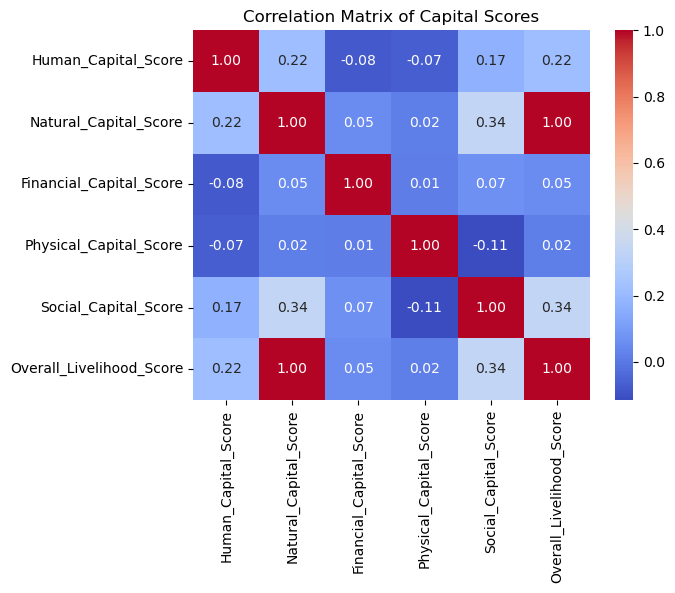

Overall_Livelihood_Score                                                                         1.000000
Natural_Capital_Score                                                                            1.000000
Total Land Area (sq ft)                                                                          0.980941
Rainfed Cultivation (sq ft)                                                                      0.939570
All Season Cultivation Area (sq ft)                                                              0.898294
                                                                                                   ...   
Reasons for land not being used: _landless                                                      -0.368806
Housing_Mud Structure                                                                           -0.369210
4. Labor Distribution: Who is taking care of the field?_Nobody is taking care                   -0.389921
Dalit/Non Dalit                               

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data already has the capital scores computed
capital_scores = ['Human_Capital_Score', 'Natural_Capital_Score', 
                  'Financial_Capital_Score', 'Physical_Capital_Score','Social_Capital_Score',
                  'Overall_Livelihood_Score']

# Correlation matrix for capital indices
correlation_matrix = df[capital_scores].corr()

# Display correlation matrix
print(correlation_matrix)

# Visualize correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Capital Scores")
plt.show()

# Correlation of all individual variables with the Overall Livelihood Score
correlations_with_livelihood = df.corr()['Overall_Livelihood_Score'].sort_values(ascending=False)
print(correlations_with_livelihood)


In [13]:
import statsmodels.api as sm
X = df[['Human_Capital_Score', 'Natural_Capital_Score', 'Financial_Capital_Score', 'Physical_Capital_Score','Social_Capital_Score']]
y = df['Do you have land that has been abandoned']  # Binary column for land abandonment
X = sm.add_constant(X)  # Add constant for intercept
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.498512
         Iterations 6
                                      Logit Regression Results                                      
Dep. Variable:     Do you have land that has been abandoned   No. Observations:                  184
Model:                                                Logit   Df Residuals:                      178
Method:                                                 MLE   Df Model:                            5
Date:                                      Mon, 03 Feb 2025   Pseudo R-squ.:                 0.09374
Time:                                              14:47:04   Log-Likelihood:                -91.726
converged:                                             True   LL-Null:                       -101.21
Covariance Type:                                  nonrobust   LLR p-value:                  0.001943
                              coef    std err          z      P>|z|      [0.025      0.975

In [14]:
import statsmodels.api as sm

X = df[['Human_Capital_Score', 'Natural_Capital_Score', 'Financial_Capital_Score',
          'Physical_Capital_Score', 'Vulnerability_Score','Social_Capital_Score','Livelihood_Strategy_Score']]
X = sm.add_constant(X)  # Add constant for intercept
y = df['Do you have land that has been abandoned']

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.493234
         Iterations 6
                                      Logit Regression Results                                      
Dep. Variable:     Do you have land that has been abandoned   No. Observations:                  184
Model:                                                Logit   Df Residuals:                      176
Method:                                                 MLE   Df Model:                            7
Date:                                      Mon, 03 Feb 2025   Pseudo R-squ.:                  0.1033
Time:                                              14:47:04   Log-Likelihood:                -90.755
converged:                                             True   LL-Null:                       -101.21
Covariance Type:                                  nonrobust   LLR p-value:                  0.003894
                                coef    std err          z      P>|z|      [0.025      0.9